# Predicting Car Prices

## Intro to Data Set

In [79]:
import pandas as pd
import numpy as np
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt
%matplotlib inline

cars = pd.read_csv("imports-85.data", names=['symboling', 'normalized_losses', 'make', 'fuel_type', 'aspiration', 'num_doors',
                                             'body_style', 'drive_wheels', 'engine_location', 'wheel_base', 'length', 
                                            'width', 'height', 'curb_weight', 'engine_type', 'num_cylinders', 'engine_size', 
                                            'fuel_system', 'bore', 'stroke', 'compression_ratio', 'horsepower', 'peak_rpm', 
                                            'city_mpg', 'highway_mpg', 'price'])
cars.head()

,symboling,normalized_losses,make,fuel_type,aspiration,num_doors,body_style,drive_wheels,engine_location,wheel_base,...,engine_size,fuel_system,bore,stroke,compression_ratio,horsepower,peak_rpm,city_mpg,highway_mpg,price
0,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,1,?,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450


In [80]:
cars.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
symboling            205 non-null int64
normalized_losses    205 non-null object
make                 205 non-null object
fuel_type            205 non-null object
aspiration           205 non-null object
num_doors            205 non-null object
body_style           205 non-null object
drive_wheels         205 non-null object
engine_location      205 non-null object
wheel_base           205 non-null float64
length               205 non-null float64
width                205 non-null float64
height               205 non-null float64
curb_weight          205 non-null int64
engine_type          205 non-null object
num_cylinders        205 non-null object
engine_size          205 non-null int64
fuel_system          205 non-null object
bore                 205 non-null object
stroke               205 non-null object
compression_ratio    205 non-null float64
horsepower           205 non-nul

At this stage it seems I have plenty of feature columns at my disposal. However, I'm thinking that items like 'drive_wheels', which is an object at the moment, could have a considerable effect on price and may well need to be converted.

Before I do this, I shall explore and clean up some of these columns. For starters I can clearly see some items missing in the first few rows.

In [81]:
cars = cars.replace('?', np.nan)

In [82]:
cars['normalized_losses'] = cars['normalized_losses'].astype(float)

In [83]:
object_to_float = ['bore', 'stroke', 'horsepower', 'peak_rpm', 'price']
cars[object_to_float] = cars[object_to_float].astype(float)

In [84]:
cars.dtypes

symboling              int64
normalized_losses    float64
make                  object
fuel_type             object
aspiration            object
num_doors             object
body_style            object
drive_wheels          object
engine_location       object
wheel_base           float64
length               float64
width                float64
height               float64
curb_weight            int64
engine_type           object
num_cylinders         object
engine_size            int64
fuel_system           object
bore                 float64
stroke               float64
compression_ratio    float64
horsepower           float64
peak_rpm             float64
city_mpg               int64
highway_mpg            int64
price                float64
dtype: object

In [85]:
cars['normalized_losses'].isnull().value_counts()

False    164
True      41
Name: normalized_losses, dtype: int64

We have 41 instances of NaN within the normalized_losses column. This is almost a quarter of the entire column and I would expect it to have a huge effect on our model. Because of this, I will drop the column completely instead of trying to replace these values with something else. After all, I don't believe this column is greatly important in determining the price.

In [86]:
cars = cars.drop('normalized_losses', axis=1)

In [87]:
cars.head()

,symboling,make,fuel_type,aspiration,num_doors,body_style,drive_wheels,engine_location,wheel_base,length,...,engine_size,fuel_system,bore,stroke,compression_ratio,horsepower,peak_rpm,city_mpg,highway_mpg,price
0,3,alfa-romero,gas,std,two,convertible,rwd,front,88.6,168.8,...,130,mpfi,3.47,2.68,9.0,111.0,5000.0,21,27,13495.0
1,3,alfa-romero,gas,std,two,convertible,rwd,front,88.6,168.8,...,130,mpfi,3.47,2.68,9.0,111.0,5000.0,21,27,16500.0
2,1,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,171.2,...,152,mpfi,2.68,3.47,9.0,154.0,5000.0,19,26,16500.0
3,2,audi,gas,std,four,sedan,fwd,front,99.8,176.6,...,109,mpfi,3.19,3.40,10.0,102.0,5500.0,24,30,13950.0
4,2,audi,gas,std,four,sedan,4wd,front,99.4,176.6,...,136,mpfi,3.19,3.40,8.0,115.0,5500.0,18,22,17450.0


In [88]:
cars.isnull().sum()

symboling            0
make                 0
fuel_type            0
aspiration           0
num_doors            2
body_style           0
drive_wheels         0
engine_location      0
wheel_base           0
length               0
width                0
height               0
curb_weight          0
engine_type          0
num_cylinders        0
engine_size          0
fuel_system          0
bore                 4
stroke               4
compression_ratio    0
horsepower           2
peak_rpm             2
city_mpg             0
highway_mpg          0
price                4
dtype: int64

Still a few more rows spread across multiple columns with no values. I feel comfortable enough to drop these rows as they're so minimal

In [89]:
cars = cars.dropna()

In [90]:
cars.isnull().sum()

symboling            0
make                 0
fuel_type            0
aspiration           0
num_doors            0
body_style           0
drive_wheels         0
engine_location      0
wheel_base           0
length               0
width                0
height               0
curb_weight          0
engine_type          0
num_cylinders        0
engine_size          0
fuel_system          0
bore                 0
stroke               0
compression_ratio    0
horsepower           0
peak_rpm             0
city_mpg             0
highway_mpg          0
price                0
dtype: int64

In [91]:
cars = cars.drop(['symboling', 'make', 'fuel_type', 'aspiration', 'num_doors', 'body_style', 
                 'drive_wheels', 'engine_location', 'engine_type', 'num_cylinders', 'fuel_system'], axis=1)

I've now cleaned the data so that all remains is numerical attributes. We can now go on and normalize these values.

In [92]:
price_col = cars['price']
normalized_listings = (cars - cars.min()) / (cars.max() - cars.min())
normalized_listings['price'] = price_col
normalized_listings.head()

,wheel_base,length,width,height,curb_weight,engine_size,bore,stroke,compression_ratio,horsepower,peak_rpm,city_mpg,highway_mpg,price
0,0.058309,0.413433,0.324786,0.083333,0.411171,0.260377,0.664286,0.290476,0.1250,0.294393,0.346939,0.222222,0.289474,13495.0
1,0.058309,0.413433,0.324786,0.083333,0.411171,0.260377,0.664286,0.290476,0.1250,0.294393,0.346939,0.222222,0.289474,16500.0
2,0.230321,0.449254,0.444444,0.383333,0.517843,0.343396,0.100000,0.666667,0.1250,0.495327,0.346939,0.166667,0.263158,16500.0
3,0.384840,0.529851,0.504274,0.541667,0.329325,0.181132,0.464286,0.633333,0.1875,0.252336,0.551020,0.305556,0.368421,13950.0
4,0.373178,0.529851,0.521368,0.541667,0.518231,0.283019,0.464286,0.633333,0.0625,0.313084,0.551020,0.138889,0.157895,17450.0


## Univariate Model

In [93]:
def knn_train_test(train_col, target_col, df, hp=5):
    knn = KNeighborsRegressor(n_neighbors=hp)
    np.random.seed(1)
    
    shuffled_index = np.random.permutation(df.index)
    rand_df = df.reindex(shuffled_index)
    
    last_train_row = int(len(rand_df) / 2)
    
    train_df = rand_df.iloc[0:last_train_row]
    test_df = rand_df.iloc[last_train_row:]
    
    knn.fit(train_df[[train_col]], train_df[target_col])
    predicted_price = knn.predict(test_df[[train_col]])

    mse = mean_squared_error(test_df[target_col], predicted_price)
    rmse = np.sqrt(mse)
    return rmse

rmse_results = {}
train_cols = cars.columns.drop('price')

for col in train_cols:
    rmse_val = knn_train_test(col, 'price', normalized_listings)
    rmse_results[col] = rmse_val
    
rmse_results_series = pd.Series(rmse_results)
rmse_results_series.sort_values()


engine_size          3247.858492
curb_weight          4277.090667
city_mpg             4453.397655
highway_mpg          4457.947353
width                4586.631863
horsepower           4928.543248
length               5823.219231
wheel_base           5879.632781
compression_ratio    6654.971495
bore                 7204.001553
stroke               8008.490178
peak_rpm             8243.362449
height               8471.473079
dtype: float64

In [94]:
def knn_train_test(train_col, target_col, df):
    np.random.seed(1)
    
    shuffled_index = np.random.permutation(df.index)
    rand_df = df.reindex(shuffled_index)
    
    last_train_row = int(len(rand_df) / 2)
    
    train_df = rand_df.iloc[0:last_train_row]
    test_df = rand_df.iloc[last_train_row:]
    
    k_values = [1, 3, 5, 7, 9]
    k_rmses = {}
    
    for k in k_values:
        knn = KNeighborsRegressor(n_neighbors=k)
        knn.fit(train_df[[train_col]], train_df[target_col])
        
        predicted_labels = knn.predict(test_df[[train_col]])
        
        mse = mean_squared_error(test_df[target_col], predicted_labels)
        rmse = np.sqrt(mse)
        
        k_rmses[k] = rmse
    return k_rmses

k_rmse_results = {}
train_cols = normalized_listings.columns.drop('price')

for col in train_cols:
    rmse_val = knn_train_test(col, 'price', normalized_listings)
    k_rmse_results[col] = rmse_val
    
k_rmse_results

{'bore': {1: 7289.379536759479,
  3: 7252.0135214775355,
  5: 7204.001552974411,
  7: 7200.340643723126,
  9: 7165.445393921243},
 'city_mpg': {1: 5634.7070131206765,
  3: 4295.1437456859785,
  5: 4453.397655306413,
  7: 4308.397539809335,
  9: 4701.149969138174},
 'compression_ratio': {1: 7838.400373314133,
  3: 7012.187433743944,
  5: 6654.97149452871,
  7: 6533.591537872384,
  9: 6776.214584519611},
 'curb_weight': {1: 5007.487233308995,
  3: 4142.948725351724,
  5: 4277.090667081186,
  7: 4352.41997270106,
  9: 4774.595281788251},
 'engine_size': {1: 3489.2445287545124,
  3: 3117.548910174633,
  5: 3247.858491978603,
  7: 3621.839678193111,
  9: 3934.7415704747746},
 'height': {1: 10889.539460881855,
  3: 8567.789618190958,
  5: 8471.47307870945,
  7: 8137.528220733606,
  9: 8215.912288400235},
 'highway_mpg': {1: 4739.653891404865,
  3: 4256.584038115483,
  5: 4457.947353039764,
  7: 4562.009481668715,
  9: 4827.296450999963},
 'horsepower': {1: 4489.554931675976,
  3: 4481.678972

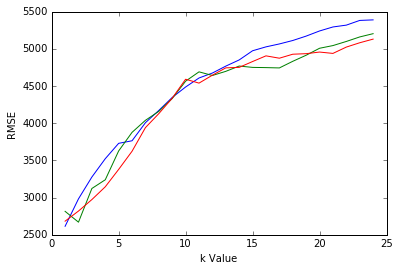

In [102]:
for k,v in k_rmse_results.items():
    x = list(v.keys())
    y = list(v.values())
    
    plt.plot(x,y)
    plt.xlabel('k Value')
    plt.ylabel('RMSE')

## Multivariate Model

In [96]:
feature_avg_rmse = {}
for k,v in k_rmse_results.items():
    avg_rmse = np.mean(list(v.values()))
    feature_avg_rmse[k] = avg_rmse

series_avg_rmse = pd.Series(feature_avg_rmse)
sorted_series_avg_rmse = series_avg_rmse.sort_values()
print(sorted_series_avg_rmse)
sorted_features = sorted_series_avg_rmse.index

engine_size          3482.246636
curb_weight          4510.908376
highway_mpg          4568.698243
width                4617.027942
city_mpg             4678.559185
horsepower           4851.037648
length               5920.664471
wheel_base           5968.854942
compression_ratio    6963.073085
bore                 7222.236130
peak_rpm             7804.942989
stroke               8096.978918
height               8856.448533
dtype: float64


In [97]:
def knn_train_test(train_cols, target_col, df):
    np.random.seed(1)
    
    shuffled_index = np.random.permutation(df.index)
    rand_df = df.reindex(shuffled_index)
    
    last_train_row = int(len(rand_df) / 2)
    
    train_df = rand_df.iloc[0:last_train_row]
    test_df = rand_df.iloc[last_train_row:]
    
    k_values = [5]
    k_rmses = {}
    
    for k in k_values:
        knn = KNeighborsRegressor(n_neighbors=k)
        knn.fit(train_df[train_cols], train_df[target_col])
        
        predicted_labels = knn.predict(test_df[train_cols])
        
        mse = mean_squared_error(test_df[target_col], predicted_labels)
        rmse = np.sqrt(mse)
        
        k_rmses[k] = rmse
    return k_rmses

k_rmse_results = {}

for nr_best_feats in range(2, 6):
    k_rmse_results['{} best features'.format(nr_best_feats)] = knn_train_test(
        sorted_features[:nr_best_feats],
        'price', 
        normalized_listings)
    
k_rmse_results

{'2 best features': {5: 3379.0992220065023},
 '3 best features': {5: 3627.3090820754737},
 '4 best features': {5: 3729.4451540562177},
 '5 best features': {5: 3638.8989152577346}}

## Hyperparameter Tuning

In [98]:
def knn_train_test(train_cols, target_col, df):
    np.random.seed(1)
    
    shuffled_index = np.random.permutation(df.index)
    rand_df = df.reindex(shuffled_index)
    
    last_train_row = int(len(rand_df) / 2)
    
    train_df = rand_df.iloc[0:last_train_row]
    test_df = rand_df.iloc[last_train_row:]
    
    k_values = [i for i in range(1, 25)]
    k_rmses = {}
    
    for k in k_values:
        knn = KNeighborsRegressor(n_neighbors=k)
        knn.fit(train_df[train_cols], train_df[target_col])
        
        predicted_labels = knn.predict(test_df[train_cols])
        
        mse = mean_squared_error(test_df[target_col], predicted_labels)
        rmse = np.sqrt(mse)
        
        k_rmses[k] = rmse
        
    return k_rmses

k_rmse_results = {}

for nr_best_feats in range(2, 5):
    k_rmse_results['{} best features'.format(nr_best_feats)] = knn_train_test(
    sorted_features[:nr_best_feats],
    'price', 
    normalized_listings
    )
    
k_rmse_results

{'2 best features': {1: 2683.284145245097,
  2: 2819.2392037825257,
  3: 2973.5367772462037,
  4: 3145.211438506539,
  5: 3379.0992220065023,
  6: 3623.108673172447,
  7: 3940.574272047145,
  8: 4129.236348937488,
  9: 4336.571610274917,
  10: 4590.9961999481275,
  11: 4538.7205737262775,
  12: 4645.2932975774875,
  13: 4743.885776229753,
  14: 4750.293026944415,
  15: 4828.887312577463,
  16: 4905.220818974523,
  17: 4873.579507657385,
  18: 4927.170067644631,
  19: 4934.477848393986,
  20: 4956.285402770037,
  21: 4938.075767071905,
  22: 5023.13942472865,
  23: 5081.153350574057,
  24: 5130.12183701395},
 '3 best features': {1: 2815.290468616056,
  2: 2669.8815444397915,
  3: 3122.4809529058816,
  4: 3239.6539506120857,
  5: 3627.3090820754737,
  6: 3876.988421175215,
  7: 4038.9587925502797,
  8: 4159.467535413303,
  9: 4331.885305865006,
  10: 4564.878868606652,
  11: 4690.20637350911,
  12: 4641.44545306278,
  13: 4696.986238712182,
  14: 4768.3657256894785,
  15: 4750.1030534670

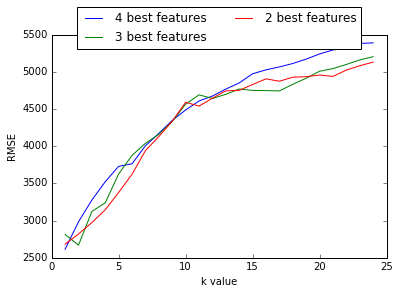

In [101]:
for k,v in k_rmse_results.items():
    x = list(v.keys())
    y = list(v.values())
    plt.plot(x, y, label='{}'.format(k))
    
plt.xlabel('k value')
plt.ylabel('RMSE')
plt.legend(loc="upper center", bbox_to_anchor=(0.5, 1.15), ncol=2)